In [1]:
# Plotting and Data Manipulation
import pandas as pd
import numpy as np
import math

import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib import gridspec

# Statistics and Machine Learning
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

import scipy
from scipy.signal import savgol_filter

# Other
import warnings
warnings.filterwarnings('ignore')


In [2]:
from pathlib import Path
import sys
parent_dir = str(Path().absolute().parent)
sys.path.append(parent_dir)

print(parent_dir)

/home/wksnr/Public/riset/BWLI-modified


In [3]:
from src.data_prep.read_las import read_las

file_name = "../data/raw/ll-4_wire_lima.las"
well_name = "LL-4"
renamed_columns = {'DEPTH' : 'DEPT', 'RT' : 'DR', 'ILM' : 'MR', 'LLS':'SR', 'NPHI_CORR':'NPHI'} # {nama_asli : nama_baru, ... , dst}
columns = ["DEPT","GR", "CALI", "MR", "DR", "SR", "NPHI", "RHOB", "DT", "SP", "VSH", "RW", "WELL"]

data = read_las(file_name, well_name, renamed_columns, columns, keep_original = False)

Only engine='normal' can read wrapped files


In [4]:
data.head()

,WELL,DEPT,GR,CALI,MR,DR,SR,NPHI,RHOB,DT,SP,VSH,RW
0,LL-4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205728
1,LL-4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205695
2,LL-4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205662
3,LL-4,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205629
4,LL-4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205596


In [5]:
columns_to_plot = ["GR", "DR", "SR", "NPHI", "RHOB", "VSH", "RW"]
columns_unit = ["API", "ohm/m", "ohm.m", "v/v", "g/cm³", "v/v", "ohm"]

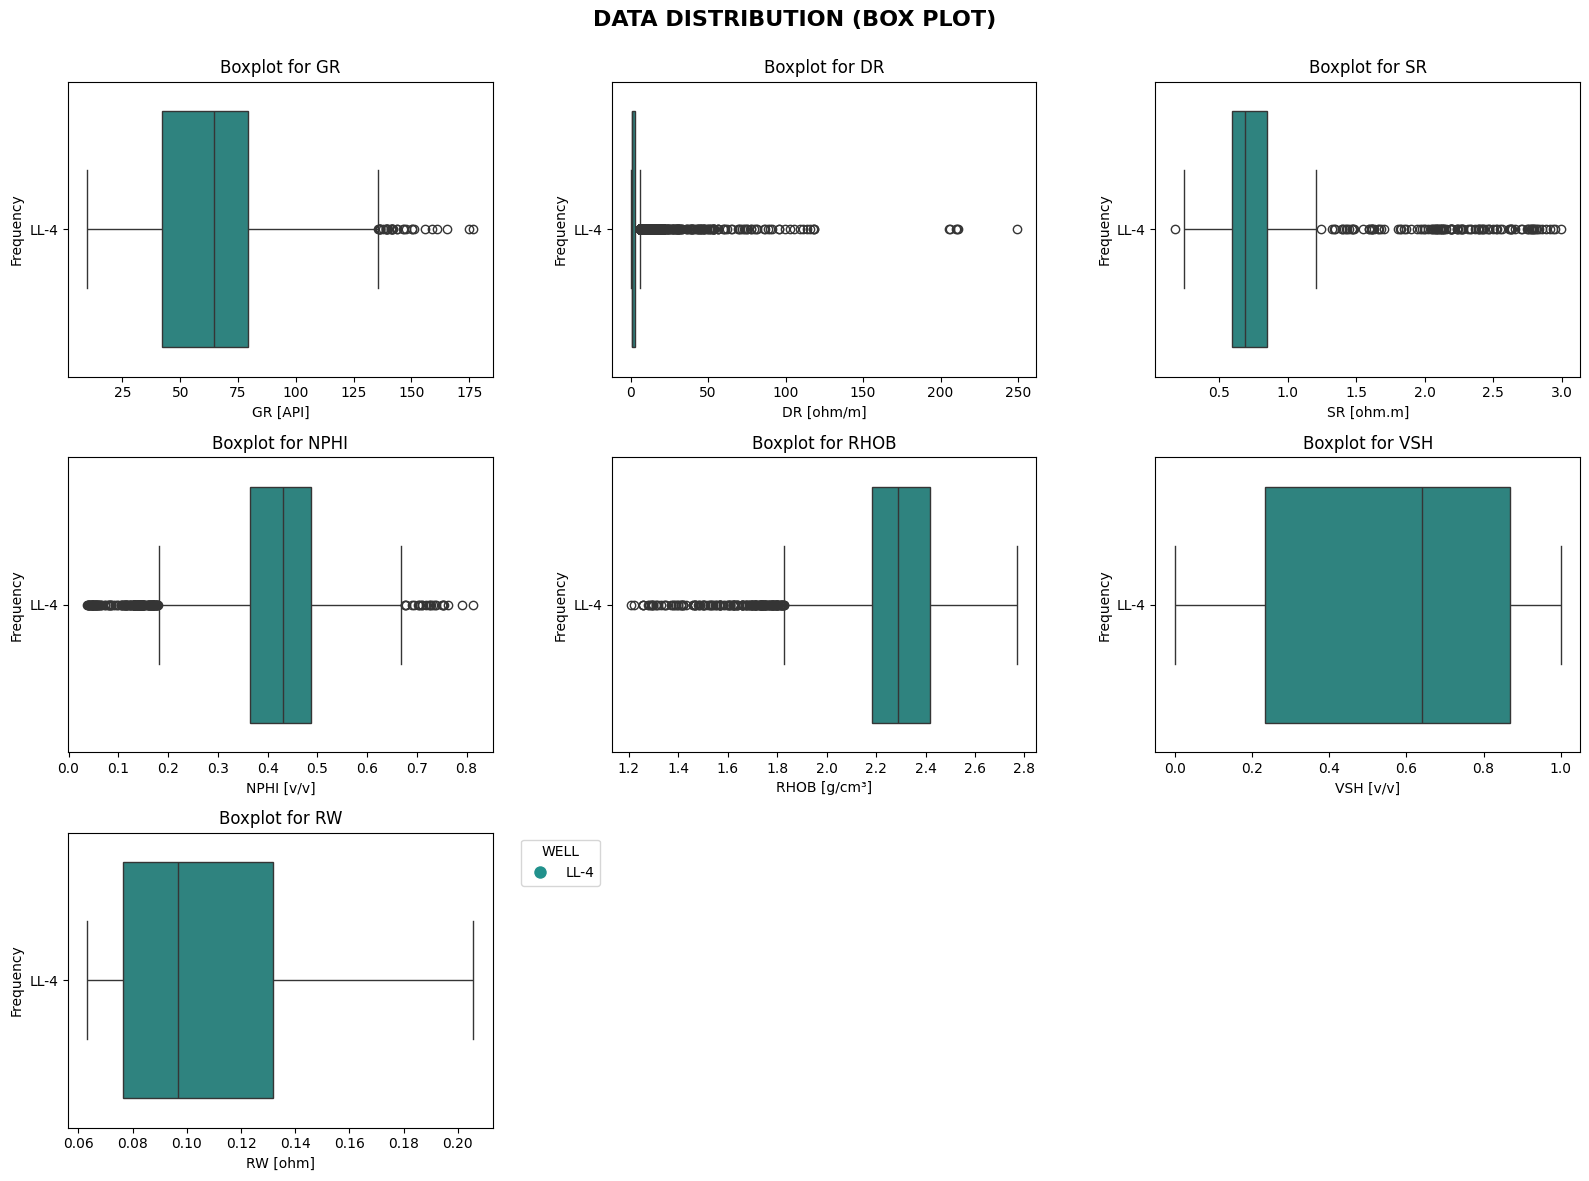

In [6]:
from src.data_vis.distPlot import boxplot

boxplot(data, columns_to_plot, columns_unit)

In [7]:
data.describe()

,DEPT,GR,CALI,MR,DR,SR,NPHI,RHOB,DT,SP,VSH,RW
count,13981.000000,10390.000000,10394.000000,10374.000000,10440.000000,1210.000000,9184.000000,9314.000000,9615.000000,10394.000000,4679.000000,13981.000000
mean,3495.000000,63.907625,12.115885,2.312847,3.093636,0.835083,0.420528,2.296849,107.581031,19.632336,0.561747,0.107826
std,2018.055696,27.017865,3.027074,3.298621,8.397807,0.480027,0.097965,0.191633,24.303341,56.193522,0.340048,0.037525
min,0.000000,9.900000,0.000000,0.200600,0.330000,0.174200,0.038000,1.210000,0.000000,-129.000000,0.000000,0.063355
25%,1747.500000,42.062500,9.460000,0.717725,0.802975,0.591600,0.363900,2.182900,89.500000,-37.100000,0.233600,0.076609
50%,3495.000000,64.720000,12.340000,0.932550,1.040000,0.688700,0.431500,2.287200,108.550000,17.950000,0.641300,0.096876
75%,5242.500000,79.400000,12.740000,2.450075,2.852450,0.851100,0.487025,2.420000,122.100000,73.800000,0.868800,0.131724
max,6990.000000,176.800000,22.270000,46.344700,249.379000,2.992300,0.813700,2.770000,191.061000,121.100000,1.000000,0.205728


In [8]:
selected_data = data[data['WELL'] == well_name].copy()

In [9]:
selected_data.describe()

,DEPT,GR,CALI,MR,DR,SR,NPHI,RHOB,DT,SP,VSH,RW
count,13981.000000,10390.000000,10394.000000,10374.000000,10440.000000,1210.000000,9184.000000,9314.000000,9615.000000,10394.000000,4679.000000,13981.000000
mean,3495.000000,63.907625,12.115885,2.312847,3.093636,0.835083,0.420528,2.296849,107.581031,19.632336,0.561747,0.107826
std,2018.055696,27.017865,3.027074,3.298621,8.397807,0.480027,0.097965,0.191633,24.303341,56.193522,0.340048,0.037525
min,0.000000,9.900000,0.000000,0.200600,0.330000,0.174200,0.038000,1.210000,0.000000,-129.000000,0.000000,0.063355
25%,1747.500000,42.062500,9.460000,0.717725,0.802975,0.591600,0.363900,2.182900,89.500000,-37.100000,0.233600,0.076609
50%,3495.000000,64.720000,12.340000,0.932550,1.040000,0.688700,0.431500,2.287200,108.550000,17.950000,0.641300,0.096876
75%,5242.500000,79.400000,12.740000,2.450075,2.852450,0.851100,0.487025,2.420000,122.100000,73.800000,0.868800,0.131724
max,6990.000000,176.800000,22.270000,46.344700,249.379000,2.992300,0.813700,2.770000,191.061000,121.100000,1.000000,0.205728


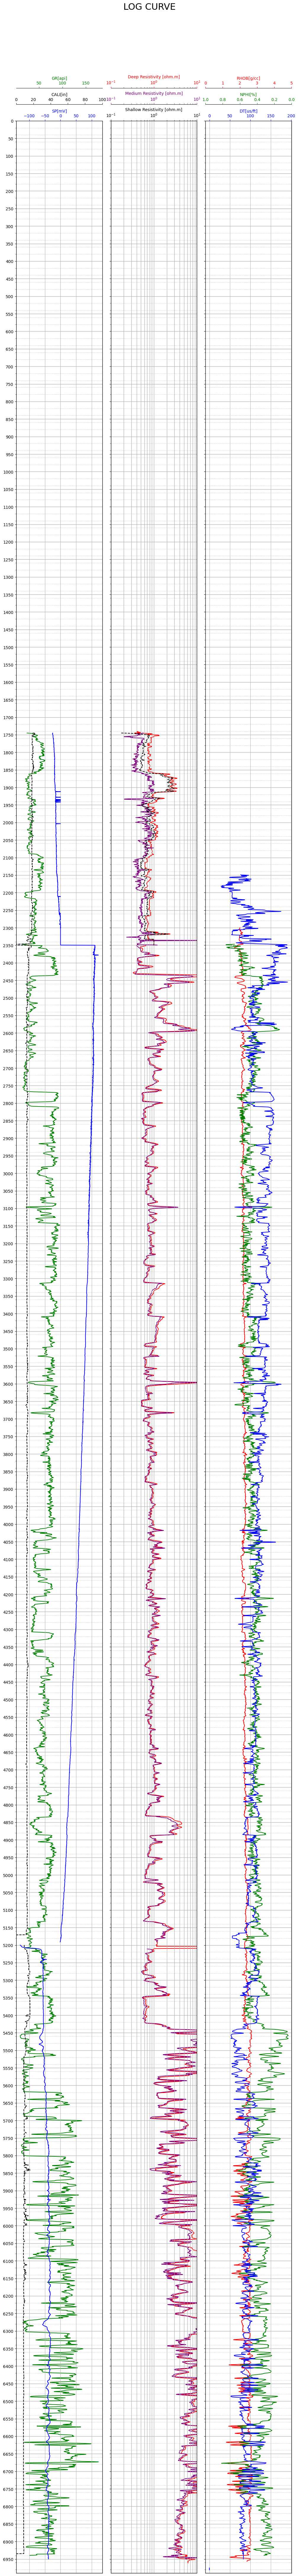

In [10]:
from src.data_vis.comboPlot import combo_plot

# DISPLAYS LOG DATA FROM THE END TO THE BOTTOM (MENTAHAN)
SP_min = "auto" #lowersp limit sp
SP_max = "auto" #sp upper limit
CALI_min = 0 #CALI lower limit
CALI_max = 100 #CALI upper limit
GR_min = "auto" #lower limit GR
GR_max = "auto" #upper limit of GR
DR_min = 0.1 #DR lower limit
DR_max = 10 #DR upper limit
MR_min = 0.1 #MR lower bound
MR_max = 10 #MR upper limit
SR_min = 0.1 #lower SR limit
SR_max = 10 #SR upper limit
RHOB_min = 0 #lower limit of RHOB
RHOB_max = 5 #upper limit of RHOB
NPHI_min = 0 #NPHI lower limit
NPHI_max = 1 #NPHI upper limit
DT_min = "auto" #lowerlimit DT
DT_max = "auto" #upper limit of DT
smoothing_traject1 = "no" #default "no"
smoothing_traject2 = "no" #default "no"
smoothing_traject3 = "no" #default "no"

combo_plot(
    selected_data,
    selected_data.DEPT.min(),
    selected_data.DEPT.max(),
    100,               #figure height in inch
    0.94,              #figure position
    SP_min,
    SP_max,
    CALI_min,
    CALI_max,
    GR_min,
    GR_max,
    DR_min,
    DR_max,
    MR_min,
    MR_max,
    SR_min,
    SR_max,
    RHOB_min,
    RHOB_max,
    NPHI_min,
    NPHI_max,
    DT_min,
    DT_max,
    smoothing_traject1,
    smoothing_traject2,
    smoothing_traject3,
    100,
    20
    )

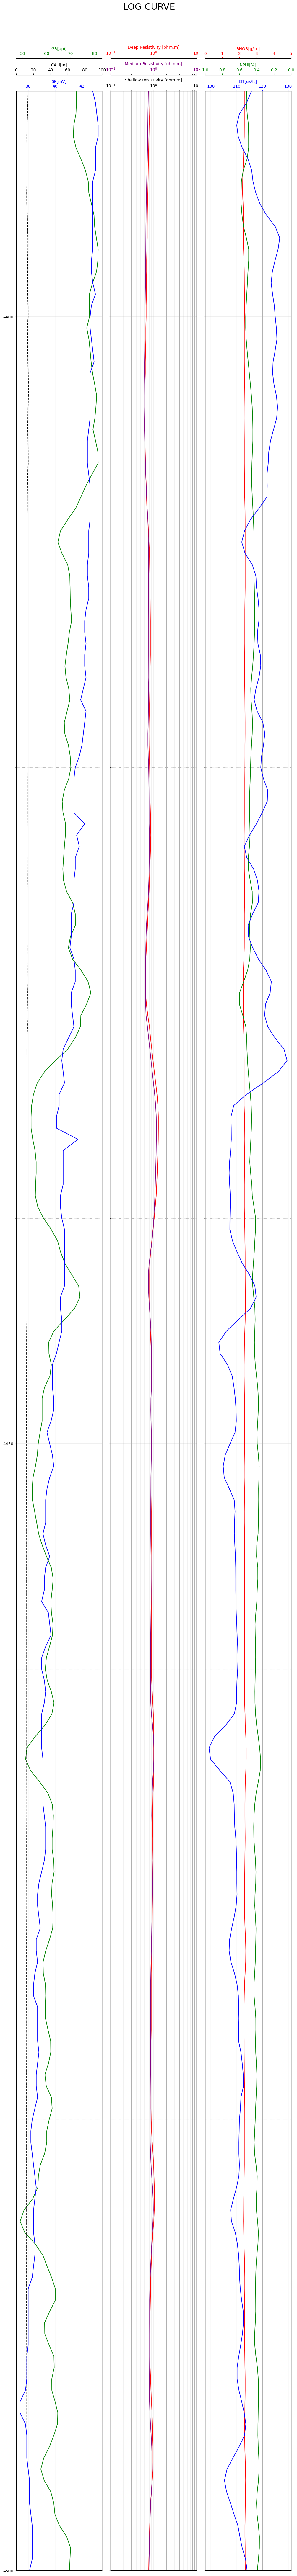

In [11]:
#MENAMPILKAN DATA LOG DARI UJUNG ATAS SAMPAI BAWAH YANG DIINGINKAN

depth_start = 4390
depth_end = 4500

combo_plot(
    selected_data,
    depth_start,
    depth_end,
    100,               #figure height in inch
    0.95,             #figure position
    SP_min,
    SP_max,
    CALI_min,
    CALI_max,
    GR_min,
    GR_max,
    DR_min,
    DR_max,
    MR_min,
    MR_max,
    SR_min,
    SR_max,
    RHOB_min,
    RHOB_max,
    NPHI_min,
    NPHI_max,
    DT_min,
    DT_max,
    smoothing_traject1,
    smoothing_traject2,
    smoothing_traject3,
    100,
    20
    )

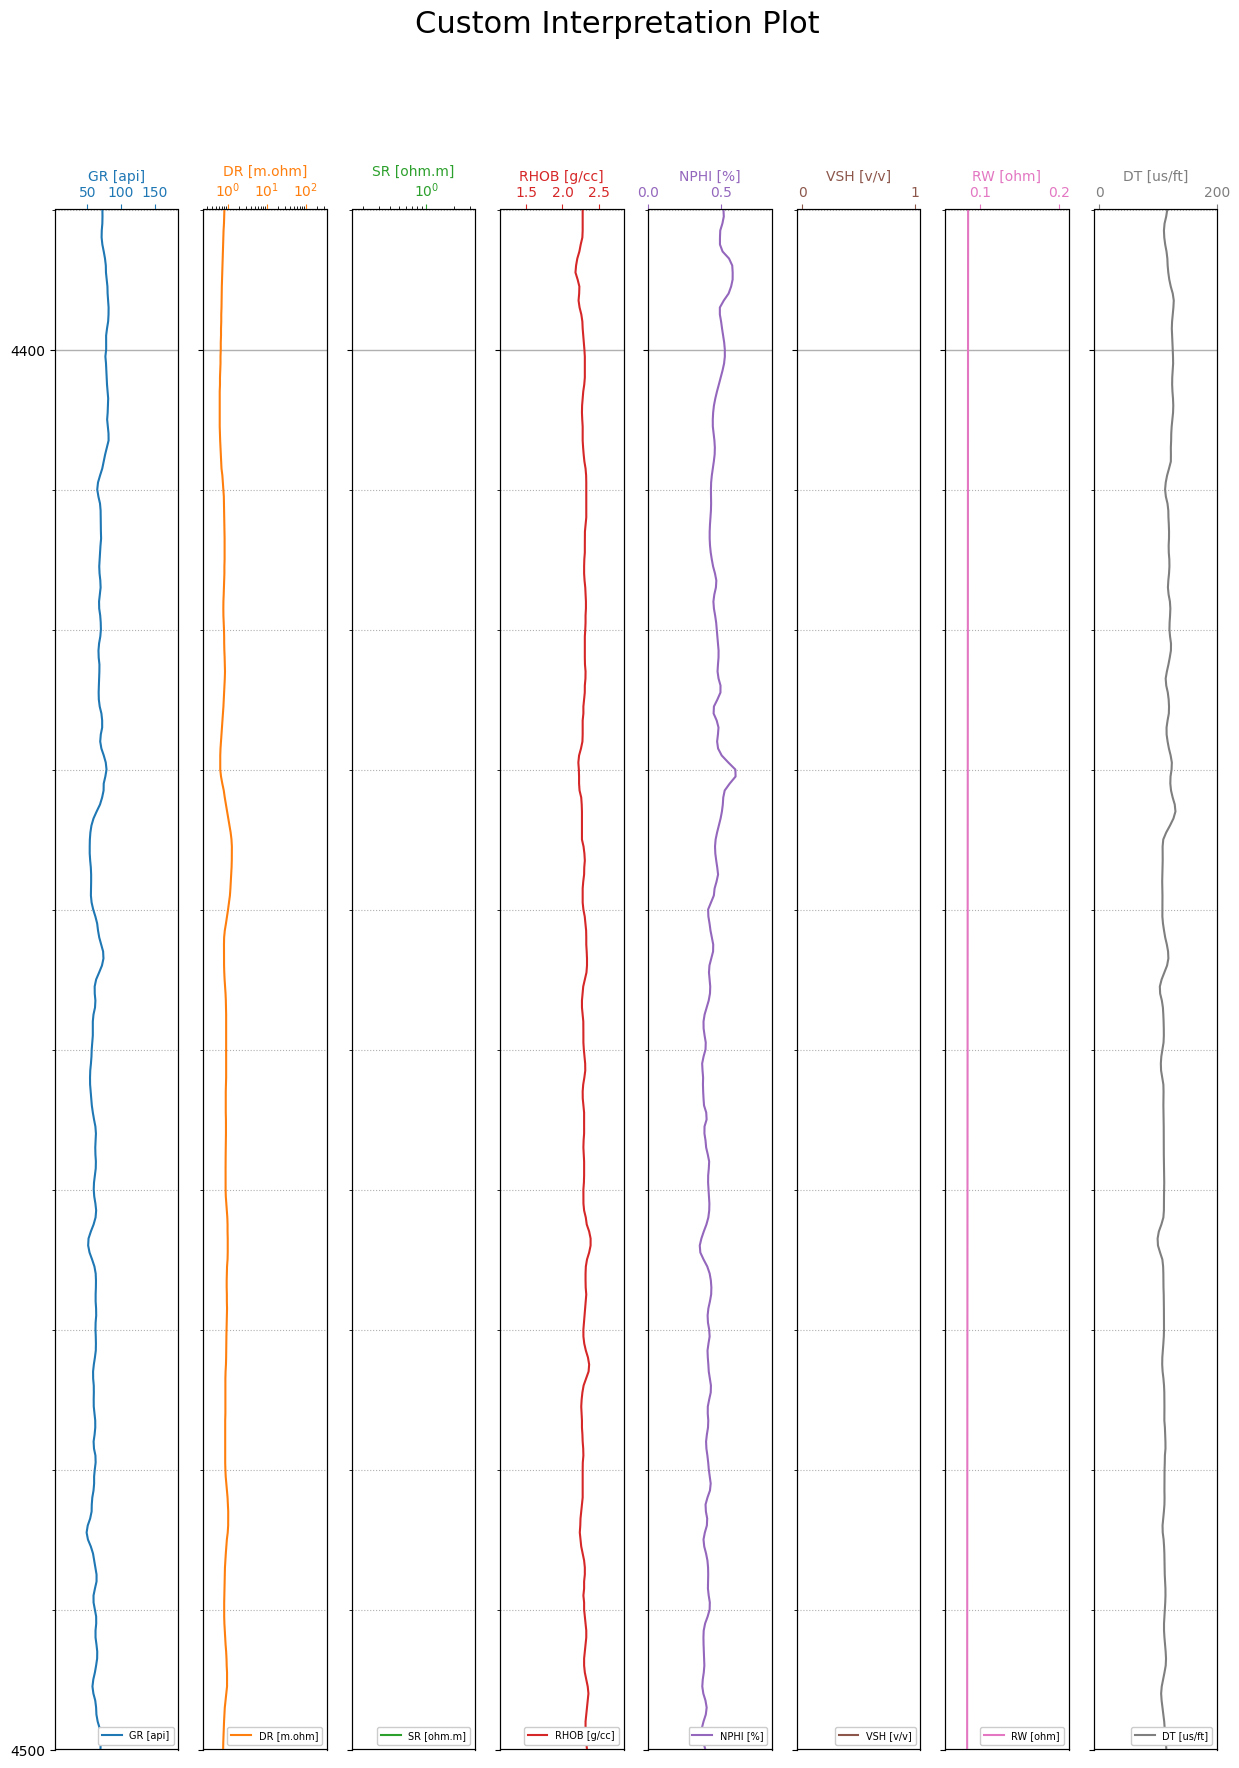

In [12]:
from src.data_vis.interpretPlot import custom_interpretation_plot
# Ori Unit ["api", "in", "mV", "m.ohm", "ohm.m", "ohm.m", "g/cc", "%", "us/ft"]
# custom_interpretation_plot(selected_data, depth_start, depth_end, "GR", "CALI", "SP", "DR", "MR", "SR", "NPHI", "RHOB", "DT", units=["API", "in", "mV", "ohm/m", "ohm.m", "ohm.m", "v/v", "g/cm³", "us/ft"])

custom_interpretation_plot(selected_data, depth_start, depth_end, "GR", "DR", "SR", "RHOB", "NPHI", "VSH", "RW", "DT", units=["api", "m.ohm", "ohm.m", "g/cc", "%", "v/v", "ohm", "us/ft"])